# Scientific Notebook: Fairness Analysis on Simulated Data (Bogotá & Chicago)

## Purpose
This notebook aims to perform a fairness analysis on crime prediction models using simulated data based on the characteristics of Bogotá and Chicago crime patterns and their defined protected/unprotected regions. It focuses on generating synthetic data that mimics real-world disparities and evaluating the fairness of models under these controlled conditions.

## Workflow Stage
This notebook is in the Simulation / Fairness Analysis stage. It uses parameters derived from real data analysis (from previous notebooks) to simulate crime patterns and then applies fairness metrics to the predictions on this simulated data.

## About
This notebook generates synthetic spatio-temporal crime data for areas resembling Bogotá and Chicago, incorporating predefined protected and unprotected regions. It then likely applies prediction models to this simulated data and analyzes the fairness of the predictions across the simulated regions, allowing for controlled experimentation on fairness impacts.

### 1. Initial Setup, Library Imports, and Path Configuration
This block performs initial setup, including importing libraries for data handling, geospatial operations, prediction models (open_cp), metrics (sklearn), and utilities. It conditionally mounts Google Drive and defines project-specific paths based on the execution environment (Colab or local), adding them to the system path. Finally, it conditionally changes the current working directory to the main data location for the experiments.

In [ ]:
# Import necessary libraries
import geopandas as gpd # For working with geospatial data
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import random # For random number generation (if used later)
import sys, os.path, os # For system and path operations
from tqdm import tqdm # For progress bars
import pickle as pkl # For loading/saving Python objects
from shapely.geometry import Point,Polygon # For geometric objects
import dateutil.parser # For parsing dates
from sklearn import metrics # For evaluation metrics (e.g., AUC)
#import panel as pn # Commented out import, possibly for interactive dashboards

# Import modules from datetime for date/time handling
from datetime import datetime, timedelta

# Conditional setup for Google Colab or local environment
# Handles mounting Google Drive and defining project paths based on environment
try:
    # Attempt to import drive from google.colab (runs in Colab)
    from google.colab import drive
    # Mount Google Drive to access files
    drive.mount('/content/drive')

    # Define paths relative to the mounted Google Drive
    # These paths point to directories containing custom libraries/scripts.
    path_opencp="drive/Shareddrives/.../Librerias/PredictCode/"
    path_fairness="drive/Shareddrives/.../Librerias/"
    path_exp="drive/Shareddrives/.../EXP0/SCRIPTS/"

except:
    # If in a local environment (Colab import fails), define paths using local file system structure
    # NOTE: These paths need to be adjusted according to your local Google Drive sync or file structure.
    path_opencp="/Users/.../Librerias/PredictCode/"
    path_fairness="/Users/.../Librerias/"
    path_exp="/Users/.../EXP0/SCRIPTS/"


# Add the defined paths to the Python system path
# This allows importing modules directly from these directories.
sys.path.insert(0, os.path.abspath(path_opencp))
sys.path.insert(0, os.path.abspath(path_fairness))
sys.path.insert(0, os.path.abspath(path_exp))

# Import additional libraries after paths are set (potentially custom ones)
import open_cp # Custom library, likely for spatio-temporal analysis/prediction
import open_cp.geometry # Geometry module from open_cp
import matplotlib.pyplot as plt # For plotting

# Conditionally change the current working directory
# This sets the base directory for subsequent file operations (e.g., loading data files).
# It attempts the Colab path first, then falls back to a local path if the first fails.
# NOTE: These paths must exist and be correct for your environment.
try:
    # Change directory to the main data folder for EXP0 (Colab path)
    os.chdir("drive/.../EXP0/DATOS")
except:
    # Change directory to the main data folder for EXP0 (Local path fallback)
    os.chdir("/Users/.../EXP0/DATOS")
    None # 'None' here does nothing if chdir fails in the except block; error would still occur if local path also fails.


Failed to import `rtree`.


### 2. Define Utility Functions and Load Spatial Masks
This block defines a utility function plot_intensity for visualizing spatial intensity grids and imports the Earth Mover's Distance (EMD) function. It then loads various spatial mask and region objects (region, locality mask, protected/unprotected/zero masks) that were previously created and saved for the simulated data. Finally, it organizes the protected and unprotected masks into a dictionary.

In [ ]:
# Define a utility function to plot spatial intensity grids.
# Takes a 2D numpy array 'intensity' and visualizes it using matplotlib.
def plot_intensity(intensity):
    # Create a figure and axes for the plot.
    fig, ax = plt.subplots(figsize=(11,5))
    # Display the intensity matrix as an image using the 'jet' colormap.
    # interpolation='none' prevents interpolation between pixels. alpha sets transparency. vmin=0 sets minimum color value.
    im=ax.imshow(intensity, 'jet', interpolation='none', alpha=0.7,vmin=0)
    # Invert the y-axis to match typical image/grid coordinates (origin top-left).
    ax.invert_yaxis()
    # Add a color bar to the plot to show the mapping of values to colors.
    plt.colorbar(im)
    # Display the plot.
    plt.show(ax)

# Import the Earth Mover's Distance (EMD) function from scipy.stats, aliasing it as emd.
from scipy.stats import wasserstein_distance as emd

# Load previously saved spatial objects from pickle files.
# These files contain the defined region and various grid masks for the simulated data.
# Paths are relative to the current working directory ("DATOS/").
region=pkl.load(open('definition_region.pkl', "rb")) # Load the rectangular region object
#mask=pkl.load(open('mascara_localidades.pkl', "rb")) # Commented out: Loading locality mask
mask_protegidos=pkl.load(open('mascara_protegidos.pkl', "rb")) # Load the boolean mask for protected regions (simulated data)
mask_noprotegidos=pkl.load(open('mascara_noprotegidos.pkl', "rb")) # Load the boolean mask for non-protected regions (simulated data)
mask_zeros=pkl.load(open('mascara_zeros.pkl', "rb")) # Load the boolean mask for zero-coded regions (simulated data)

# Create a dictionary to store the protected and non-protected boolean masks for easy access.
total_mask={"p":mask_protegidos,"n_p":mask_noprotegidos}


### 3. Load and Visualize Bogota Spatial Masks
This block loads the previously saved spatial mask and region objects (region, locality mask, protected/unprotected/zero masks) specifically for the Bogota data. It organizes the protected and unprotected masks into a dictionary and then uses the plot_intensity function (defined in the previous cell) to visualize the boolean masks for protected, non-protected, and zero-coded areas from the Bogota data.

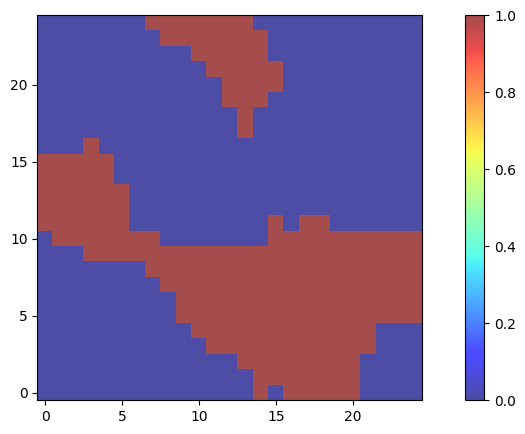

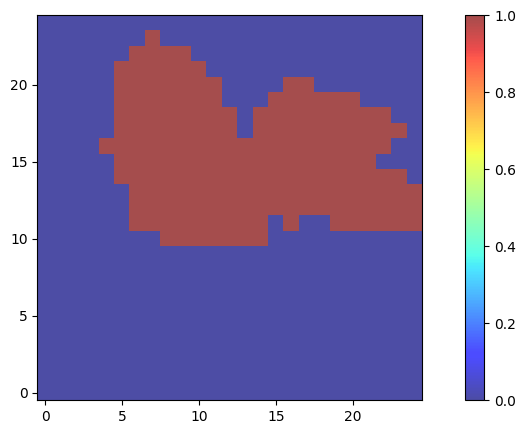

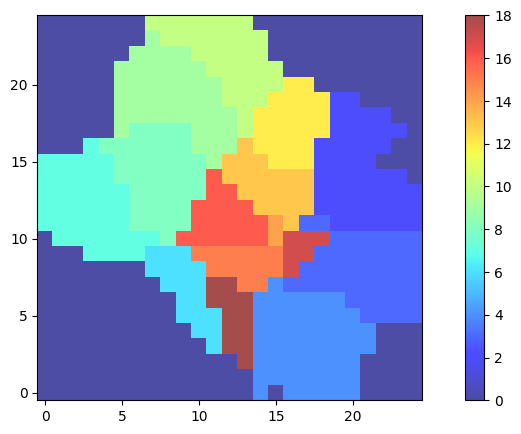

In [ ]:
# Load previously saved spatial objects specifically for Bogota from pickle files.
# These files contain the defined region and various grid masks for the Bogota data.
# Paths are relative to the current working directory ("DATOS/") and include the "BOGOTA/" subdirectory.
region=pkl.load(open('BOGOTA/definition_region.pkl', "rb")) # Load the rectangular region object for Bogota
mask=pkl.load(open('BOGOTA/mascara_localidades.pkl', "rb")) # Load the locality mask array (with locality codes) for Bogota
mask_protegidos=pkl.load(open('BOGOTA/mascara_protegidos.pkl', "rb")) # Load the boolean mask for protected regions (Bogota)
mask_noprotegidos=pkl.load(open('BOGOTA/mascara_noprotegidos.pkl', "rb")) # Load the boolean mask for non-protected regions (Bogota)
mask_zeros=pkl.load(open('BOGOTA/mascara_zeros.pkl', "rb")) # Load the boolean mask for zero-coded regions (Bogota)


# Create a dictionary to store the protected and non-protected boolean masks for easy access.
total_mask={"p":mask_protegidos,"n_p":mask_noprotegidos}

# Use the plot_intensity function (defined in cell 2) to visualize the loaded Bogota masks.
plot_intensity(mask_protegidos)   # Visualize the boolean mask for protected regions (Bogota)
plot_intensity(mask_noprotegidos) # Visualize the boolean mask for non-protected regions (Bogota)
plot_intensity(mask)              # Visualize the locality mask (with locality codes) for Bogota


### 4. Load Model Data and Prepare for Fairness Analysis
This block loads the previously generated prediction and real data dictionaries for the Naive, KDE, and SEPP models specifically for the Bogota data. It then extracts the prediction dates, imports updated fairness measure functions, loads a previous fairness results table, and calculates the sum of real crime intensity within the protected region for a specific date and model.

In [ ]:
# Load prediction and real data for each model from pickle files, specifically for Bogota.
# The paths are relative to the current working directory ("DATOS/") and include the "BOGOTA/" subdirectory.
# NOTE: Ensure the 'BOGOTA/NAIVE/', 'BOGOTA/KDE/', and 'BOGOTA/SEPP/' directories and the respective pickle files exist.
DATA={
    "Naive":{
        "predictions":pkl.load(open('BOGOTA/NAIVE/predictions_window.pkl', "rb")),
        "reals":pkl.load(open('BOGOTA/NAIVE/reals_window.pkl', "rb"))
    },
    "KDE":{
        "predictions":pkl.load(open('BOGOTA/KDE/predictions_window.pkl', "rb")),
        "reals":pkl.load(open('BOGOTA/KDE/reals_window.pkl', "rb"))
    },
    "SEPP":{
        "predictions":pkl.load(open('BOGOTA/SEPP/predictions_window.pkl', "rb")),
        "reals":pkl.load(open('BOGOTA/SEPP/reals_window.pkl', "rb"))
    }
}

# Get the keys (which are the prediction dates) from the Naive model predictions dictionary.
# Assuming all models were run for the same set of dates.
days=DATA["Naive"]["predictions"].keys()

# Import updated fairness measure functions and utilities from 'fairness_measures.measures_3'.
# NOTE: This imports measures_3, potentially different from measures_2 used previously.
from fairness_measures.measures_3 import f_benefit, f_benefit_k_most
from fairness_measures import utils, measures_3

# Define lists of fairness measure types and names (used later for analysis/plotting).
fairness_type=[measures_3.MM,measures_3.gini_coeff]
fairness_name=["Maxmin","Gini"]

# Load a previous fairness results DataFrame from a TSV file.
# This table might contain results from a prior run or different analysis.
# The path is relative to the current working directory.
# NOTE: Ensure 'fairnes_predictions_Bogota.tsv' exists.
Fairness_table_bogota=pd.read_csv('fairnes_predictions_Bogota.tsv',sep='\t')
# Clean the 'tipo_fairness' column: replace 'Max-Min' with 'Max-min' for consistency.
Fairness_table_bogota['tipo_fairness'] = Fairness_table_bogota['tipo_fairness'].str.replace('Max-Min', 'Max-min')

# Display the first few rows of the loaded and cleaned DataFrame (implicit output).
Fairness_table_bogota.head()

# Calculate the sum of real crime intensity within the protected region for a specific date and model.
# This uses variables 'model' and 'dia' which are assumed to be defined from a previous context (e.g., from a loop).
# total_mask["p"] is the boolean mask for the protected region, assumed loaded in cell 3.
# DATA[model]["reals"][dia] is the real intensity grid for the specific date and model.
# The result is normalized by the sum of intensity within the protected region.
p_realidad=DATA[model]["reals"][dia][total_mask["p"]]/np.sum(DATA[model]["reals"][dia][total_mask["p"]])
# Display the sum of the normalized intensity within the protected region (should be close to 1) (implicit output).
p_realidad.sum()


,Model,Percentage,Dia,tipo_fairness,Value,B_protected,B_no_protected,EMD,EMD_P,EMD_NP
0,Naive,0.010,2018-02-01,Max-min,0.011235,0.005138,0.036324,0.001926,0.002406,0.0036
1,Naive,0.010,2018-02-01,Gini,0.091472,0.005138,0.036324,0.001926,0.002406,0.0036
2,Naive,0.015,2018-02-01,Max-min,0.011786,0.006333,0.019446,0.001926,0.002406,0.0036
3,Naive,0.015,2018-02-01,Gini,0.103015,0.006333,0.019446,0.001926,0.002406,0.0036
4,Naive,0.020,2018-02-01,Max-min,0.011065,0.005572,0.015760,0.001926,0.002406,0.0036


In [ ]:
Fairness_table_bogota=pd.read_csv('fairnes_predictions_Bogota.tsv',sep='\t')
#Fairness_table_bogota.head()
Fairness_table_bogota.query("(Dia>='2018-11-16' and Dia<'2018-11-17') and Percentage==0.15")

,Model,Percentage,Dia,tipo_fairness,Value,B_protected,B_no_protected,EMD,EMD_P,EMD_NP
58520,Naive,0.15,2018-11-16,Max-min,0.003345,0.005659,0.007842,0.001755,0.002025,0.003477
58521,Naive,0.15,2018-11-16,Gini,0.090249,0.005659,0.007842,0.001755,0.002025,0.003477
58636,KDE,0.15,2018-11-16,Max-min,0.003228,0.006054,0.007591,0.001730,0.002002,0.003423
58637,KDE,0.15,2018-11-16,Gini,0.087803,0.006054,0.007591,0.001730,0.002002,0.003423
58752,SEPP,0.15,2018-11-16 00:00:00,Max-min,0.002369,0.006222,0.005903,0.001200,0.001478,0.002352
58753,SEPP,0.15,2018-11-16 00:00:00,Gini,0.069216,0.006222,0.005903,0.001200,0.001478,0.002352


### 5. Visualize Fairness Metrics for Bogota
This block loads the Bogota fairness results DataFrame, cleans and processes the data, and then uses the seaborn library to create a relational plot visualizing fairness metrics (Max-Min difference and Gini coefficient) across different percentages of the predicted area. The plot is faceted by the type of fairness metric and uses color to distinguish between models (Naive, KDE, SEPP). The plot is customized with specific formatting, labels, and saved to multiple image file formats.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


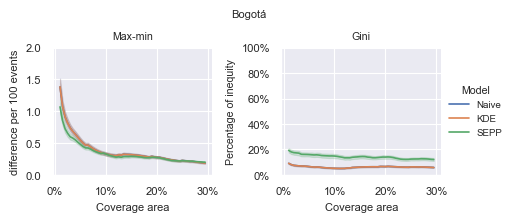

In [ ]:
# Import seaborn for enhanced statistical plotting.
import seaborn as sns
# Import matplotlib for plotting customization.
import matplotlib
# Update matplotlib parameters, setting the default font size.
matplotlib.rcParams.update({'font.size': 18}) # NOTE: This font size might be large for final output elements.

# Import specific matplotlib ticker formatters (kept from original, but PercentFormatter is used).
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

# Apply seaborn's default theme.
sns.set_theme()

# Load the fairness results DataFrame for Bogota from the TSV file.
# The path is relative to the current working directory ("DATOS/").
# NOTE: Ensure 'fairnes_predictions_Bogota.tsv' exists.
Fairness_table_bogota=pd.read_csv('fairnes_predictions_Bogota.tsv',sep='\t')
# Clean the 'tipo_fairness' column: replace 'Max-Min' with 'Max-min' for consistency.
Fairness_table_bogota['tipo_fairness'] = Fairness_table_bogota['tipo_fairness'].str.replace('Max-Min', 'Max-min')

# Iterate through the DataFrame to conditionally adjust the 'Value' column.
# If 'tipo_fairness' is 'Max-min', multiply 'Value' by 100.
for i in range(len(Fairness_table_bogota)):
    if Fairness_table_bogota['tipo_fairness'][i]=='Max-min':
           Fairness_table_bogota.loc[i, "Value"]=Fairness_table_bogota.loc[i, "Value"]*100
    else:
        None # Do nothing if not 'Max-min'

#fig, axes = plt.subplots(1, 2, figsize=(8, 3),sharey=True) # Commented out: Alternative subplot creation
# Set the seaborn context to 'paper' with a font scale.
sns.set_context("paper", font_scale=0.8)
# Define facet keyword arguments for shared y-axes across subplots (sharey=False means y-axes are independent).
facet_kws = {'sharey': False}

# Create a relational plot using seaborn's relplot.
# Data source is the filtered Fairness_table_bogota (Percentage <= 0.3).
# x="Percentage" maps the percentage of area to the x-axis.
# y="Value" maps the fairness metric value to the y-axis.
# hue="Model" colors the lines based on the 'Model' column (Naive, KDE, SEPP).
# kind="line" specifies a line plot.
# col="tipo_fairness" creates separate columns (facets) for each fairness metric type (Max-min, Gini).
# height=5 sets the height of each facet.
# aspect=0.3 sets the aspect ratio of each facet.
# facet_kws=facet_kws applies the independent y-axis setting.
# legend="brief" shows a brief legend.
g=sns.relplot(data=Fairness_table_bogota.query("Percentage<=0.3") # Data source and filtering
            ,x="Percentage"
            ,y="Value"
            ,hue="Model"
            ,kind="line"
            ,col="tipo_fairness" # Faceting by fairness metric type
            ,height=5
            ,aspect=0.3
            ,facet_kws=facet_kws # Apply facet keyword arguments
            ,legend="brief") # Show brief legend

# Customize the titles for each column (facet) using the fairness metric name.
g.set_titles(col_template="{col_name}")
# Set the axis labels for all facets.
g.set_axis_labels("Coverage area", "Value",size=8) # Set x and y axis labels
# Customize tick parameters for the x and y axes of all facets.
g.tick_params(axis='x', labelsize=8)
g.tick_params(axis='y', labelsize=8)
# Set the main title for the entire figure.
g.fig.suptitle("Bogotá", y=1.2, size=8) # y adjusts the title position, size sets font size
# Adjust the overall figure size.
g.fig.set_size_inches(6, 1.5) # Adjusted figure size

# Move the legend to a specific position outside the plot area.
# bbox_to_anchor specifies the position relative to the figure.
sns.move_legend(g, "upper left", bbox_to_anchor=(0.82, .75), title='Model') # Position and title for legend

# Access the individual axes objects within the figure.
axes = g.axes.flatten()

# Customize the first subplot (Max-min)
axes[0].set_ylim(0, 2) # Set y-axis limits
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x))) # Format x-axis as percentage
axes[0].set_ylabel('difference per 100 events') # Set y-axis label

# Customize the second subplot (Gini)
axes[1].set_ylim(0, 1) # Set y-axis limits
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x))) # Format x-axis as percentage
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) # Format y-axis as percentage
axes[1].set_ylabel('Percentage of inequity') # Set y-axis label

# Save the figure to multiple file formats with specified resolution and bounding box.
# NOTE: Ensure the 'RESULTADOS/' directory exists before running this code.
# dpi=600 sets the resolution. bbox_inches='tight' tries to remove excess whitespace.
plt.savefig('RESULTADOS/fig4a.svg',dpi=600,bbox_inches='tight')
plt.savefig('RESULTADOS/fig4a.png',dpi=600,bbox_inches='tight')
plt.savefig('RESULTADOS/fig4a.eps',dpi=600,bbox_inches='tight')
# plt.savefig('RESULTADOS/fig4a.tiff',dpi=600,bbox_inches='tight') # TIFF format not included in original code

# Display the plot.
plt.show()


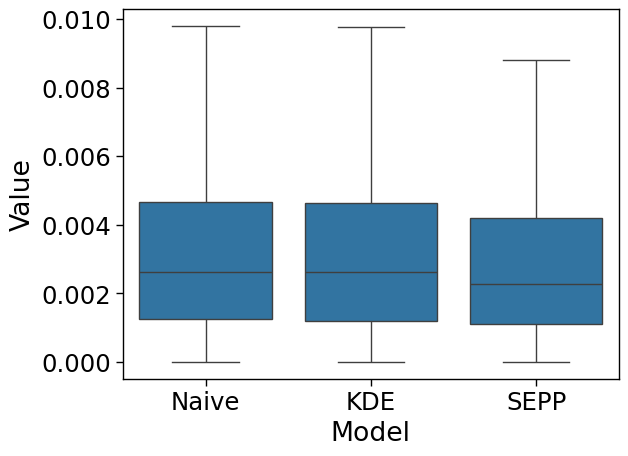

In [ ]:
g=sns.boxplot(
            x='Model',
            y='Value',
            data=Fairness_table_bogota.query("tipo_fairness=='Max-Min'"),
            order=['Naive',"KDE",'SEPP'],
            #ax=axes[j, i],
            showfliers=False,
            #row="tipo_fairness",
            dodge=False
            )

### 6. Load and Visualize Chicago Spatial Masks
This block loads the previously saved spatial mask and region objects (region, protected/unprotected/zero masks) specifically for the Chicago data. It organizes the protected and unprotected masks into a dictionary and then uses the plot_intensity function (defined in a previous cell) to visualize the boolean masks for protected and non-protected areas from the Chicago data.

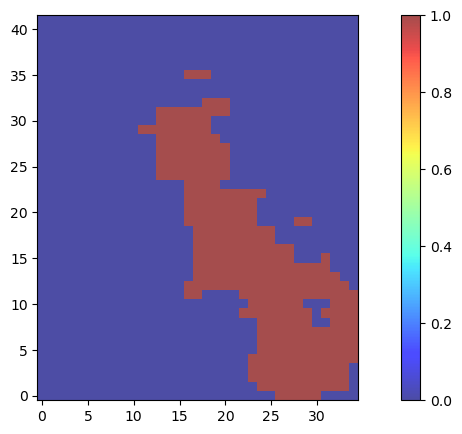

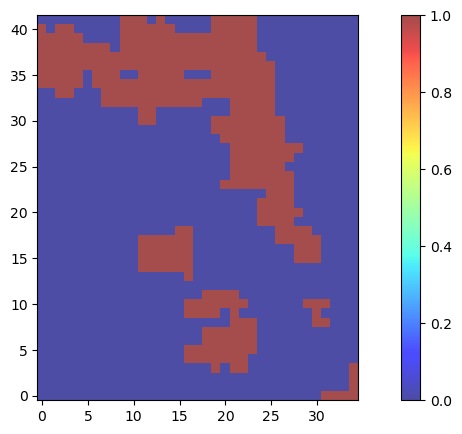

In [ ]:
# Load previously saved spatial objects specifically for Chicago from pickle files.
# These files contain the defined region and various grid masks for the Chicago data.
# Paths are relative to the current working directory ("DATOS/") and include the "CHICAGO/" subdirectory.
region=pkl.load(open('CHICAGO/chicago_definition_region.pkl', "rb")) # Load the rectangular region object for Chicago
#mask=pkl.load(open('mascara_localidades.pkl', "rb")) # Commented out: Loading locality mask (Chicago)
mask_protegidos=pkl.load(open('CHICAGO/chichago_mascara_protegidos.pkl', "rb")) # Load the boolean mask for protected regions (Chicago)
mask_noprotegidos=pkl.load(open('CHICAGO/chichago_mascara_noprotegidos.pkl', "rb")) # Load the boolean mask for non-protected regions (Chicago)
mask_zeros=pkl.load(open('CHICAGO/chichago_mascara_zeros.pkl', "rb")) # Load the boolean mask for zero-coded regions (Chicago)

# Create a dictionary to store the protected and non-protected boolean masks for easy access.
total_mask={"p":mask_protegidos,"n_p":mask_noprotegidos}

# Use the plot_intensity function (defined in cell 2) to visualize the loaded Chicago masks.
plot_intensity(mask_protegidos)   # Visualize the boolean mask for protected regions (Chicago)
plot_intensity(mask_noprotegidos) # Visualize the boolean mask for non-protected regions (Chicago)
# plot_intensity(mask_zeros) # Commented out: Visualization of zero mask


### 7. Load Model Data and Prepare for Fairness Analysis (Chicago)
This block loads the previously generated prediction and real data dictionaries for the Naive, KDE, and SEPP models specifically for the Chicago simulated data. It then extracts the prediction dates and imports updated fairness measure functions, preparing the data and tools for subsequent fairness analysis.

In [ ]:
# Load prediction and real data for each model from pickle files, specifically for Chicago simulated data.
# The paths are relative to the current working directory ("DATOS/") and include the "CHICAGO/" subdirectory.
# NOTE: Ensure the 'CHICAGO/NAIVE/', 'CHICAGO/KDE/', and 'CHICAGO/SEPP/' directories and the respective pickle files exist.
DATA={
    "Naive":{
        "predictions":pkl.load(open('CHICAGO/NAIVE/predictions_window.pkl', "rb")),
        "reals":pkl.load(open('CHICAGO/NAIVE/reals_window.pkl', "rb"))
    },
    "KDE":{
        "predictions":pkl.load(open('CHICAGO/KDE/predictions_window.pkl', "rb")),
        "reals":pkl.load(open('CHICAGO/KDE/reals_window.pkl', "rb"))
    },
    "SEPP":{
        "predictions":pkl.load(open('CHICAGO/SEPP/predictions_window.pkl', "rb")),
        "reals":pkl.load(open('CHICAGO/SEPP/reals_window.pkl', "rb"))
    }
}

# Get the keys (which are the prediction dates) from the KDE model predictions dictionary.
# Assuming all models were run for the same set of dates.
days=DATA["KDE"]["predictions"].keys()

# Import updated fairness measure functions and utilities from 'fairness_measures.measures_3'.
# NOTE: This imports measures_3, potentially different from measures_2 used previously.
from fairness_measures.measures_3 import f_benefit, f_benefit_k_most
from fairness_measures import utils, measures_3

# Define lists of fairness measure types and names (used later for analysis/plotting).
# These lists are consistent with those defined for the Bogota analysis.
fairness_type=[measures_3.MM,measures_3.gini_coeff]
fairness_name=["Maxmin","Gini"]


### 8. Calculate and Store Fairness Metrics (Chicago Simulated Data)
This block initializes a DataFrame to store fairness results for the Chicago simulated data. It then iterates through each prediction date, model (Naive, KDE, SEPP), and percentage of predicted area, calculates various fairness metrics (Benefit at K-most predicted cells, Max-Min difference, Gini coefficient, and Earth Mover's Distance variants), and appends the results to the DataFrame. Finally, the DataFrame is saved to a TSV file.

In [ ]:
# Initialize an empty pandas DataFrame to store the calculated fairness results for Chicago simulated data.
# Define columns for Model, Percentage of area, Date, Fairness Metric Type, Metric Value,
# Benefit for Protected Group, Benefit for Non-Protected Group, and different EMD values.
Fairness_table_chicago=pd.DataFrame(columns=["Model","Percentage","Dia","tipo_fairness","Value","B_protected","B_no_protected","EMD","EMD_P","EMD_NP"])

# Iterate through each prediction date ('dia') in the 'days' sequence (defined in a previous cell).
for dia in tqdm(days): # tqdm provides a progress bar

    # Iterate through each model name.
    for model in ["Naive","KDE","SEPP"]:

        # Iterate through different percentages 'p' of the total area (from 0.01 to 0.3 with steps of 0.005).
        for p in np.arange(0.01,0.3,0.005):

            # Calculate the number of cells corresponding to the current percentage 'p' for protected and non-protected areas.
            # total_mask is assumed to be defined in a previous cell (cell 6).
            number_cells_p=int(np.sum(total_mask["p"])*p)
            number_cells_up=int(np.sum(total_mask["n_p"])*p)
            # Create a dictionary storing the calculated number of top cells for each mask.
            top_mask={"p":number_cells_p,"n_p":number_cells_up}

            # Skip if the number of protected cells is zero for this percentage.
            if number_cells_p<=0:
                continue

            # Calculate the "Benefit" metric (proportion of real events in top k predicted cells) for the protected area.
            # Uses the f_benefit_k_most function (assumed imported in cell 7).
            # total_mask["p"] is the boolean mask for the protected region.
            # DATA[model]["reals"][dia] and DATA[model]["predictions"][dia] are the real and predicted intensity grids.
            B_protected=f_benefit_k_most(total_mask["p"],DATA[model]["reals"][dia],DATA[model]["predictions"][dia],number_cells_p)

            # Calculate the "Benefit" metric for the non-protected area using the corresponding mask and number of cells.
            B_no_protected=f_benefit_k_most(total_mask["n_p"],DATA[model]["reals"][dia],DATA[model]["predictions"][dia],number_cells_up)

            # Calculate Earth Mover's Distance (EMD) for the entire region, protected, and non-protected areas.
            # Normalizes the real and predicted distributions before calculating EMD.
            # emd function is assumed to be imported in cell 2.
            EMD_value=emd((DATA[model]["reals"][dia]/DATA[model]["reals"][dia].sum()).flatten(),(DATA[model]["predictions"][dia]/DATA[model]["predictions"][dia].sum()).flatten())
            EMD_value_p=emd((DATA[model]["reals"][dia][total_mask["p"]]/DATA[model]["reals"][dia][total_mask["p"]].sum()).flatten(),(DATA[model]["predictions"][dia][total_mask["p"]]/DATA[model]["predictions"][dia][total_mask["p"]].sum()).flatten())
            EMD_value_np=emd((DATA[model]["reals"][dia][total_mask["n_p"]]/DATA[model]["reals"][dia][total_mask["n_p"]].sum()).flatten(),(DATA[model]["predictions"][dia][total_mask["n_p"]]/DATA[model]["predictions"][dia][total_mask["n_p"]].sum()).flatten())

            # Calculate additional fairness metrics (Max-Min, Gini) and append all results to the DataFrame.
            # Iterate through the defined fairness metric types and names (fairness_type, fairness_name from cell 7).
            for k,k_name in zip(fairness_type,fairness_name):
                # Calculate the fairness metric value using the function 'k' (MM or gini_coeff).
                # These functions take total_mask, a benefit function (f_benefit), real/predicted data, and top_mask.
                valor=k(total_mask,f_benefit,DATA[model]["predictions"][dia],DATA[model]["reals"][dia],top_mask)
                # Append a new row to the DataFrame using .loc[len(Fairness_table_chicago)].
                # Include model, percentage, date, metric name, metric value, benefit values, and EMD values.
                # NOTE: The conditional date formatting based on model=="SEPP" from previous notebooks is removed, assuming consistent datetime objects.
                Fairness_table_chicago.loc[len(Fairness_table_chicago)]=[model,p,dia,k_name,valor,B_protected,B_no_protected,EMD_value,EMD_value_p,EMD_value_np]

# Clean the 'tipo_fairness' column: replace 'Maxmin' with 'Max-Min' for consistency.
# NOTE: This seems to reverse the replacement done in the Bogota notebook (cell 5). Kept as in original code.
Fairness_table_chicago['tipo_fairness'] = Fairness_table_chicago['tipo_fairness'].str.replace('Maxmin', 'Max-Min')

# Save the final Fairness_table_chicago DataFrame to a TSV file.
# The path is relative to the current working directory ("DATOS/").
# sep='\t' specifies tab as the delimiter. index=False prevents writing the DataFrame index to the file.
# NOTE: Ensure the target directory is writable.
Fairness_table_chicago.to_csv('fairnes_predictions_Chicago.tsv',sep='\t',index=False)


100%|██████████| 669/669 [1:04:44<00:00,  5.81s/it] 


In [ ]:
Fairness_table_chicago.head()

,Model,Percentage,Dia,tipo_fairness,Value,B_protected,B_no_protected,EMD,EMD_P,EMD_NP
0,Naive,0.010,2021-12-01,Max-Min,0.002237,0.003057,0.008381,0.00076,0.001787,0.001325
1,Naive,0.010,2021-12-01,Gini,0.037723,0.003057,0.008381,0.00076,0.001787,0.001325
2,Naive,0.015,2021-12-01,Max-Min,0.003161,0.002894,0.006128,0.00076,0.001787,0.001325
3,Naive,0.015,2021-12-01,Gini,0.055974,0.002894,0.006128,0.00076,0.001787,0.001325
4,Naive,0.020,2021-12-01,Max-Min,0.001959,0.002847,0.005997,0.00076,0.001787,0.001325


### 9. Visualize Fairness Metrics for Chicago Simulated Data
This block loads the Chicago simulated fairness results DataFrame, cleans and processes the data, and then uses the seaborn library to create a relational plot visualizing fairness metrics (Max-Min difference and Gini coefficient) across different percentages of the predicted area. The plot is faceted by the type of fairness metric and uses color to distinguish between models (Naive, KDE, SEPP). The plot is customized with specific formatting, labels, and saved to multiple image file formats.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


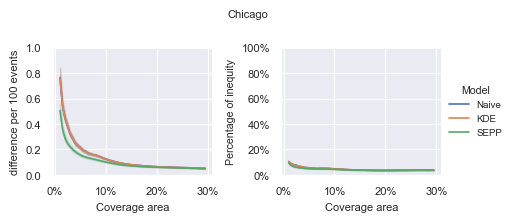

In [ ]:
# Import seaborn for enhanced statistical plotting.
import seaborn as sns
# Import matplotlib for plotting customization.
import matplotlib
# Update matplotlib parameters, setting the default font size (commented out in original).
# matplotlib.rcParams.update({'font.size': 25})

# Import specific matplotlib ticker formatters (kept from original, but PercentFormatter is used).
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

# Apply seaborn's default theme.
sns.set_theme()

# Load the fairness results DataFrame for Chicago simulated data from the TSV file.
# The path is relative to the current working directory ("DATOS/").
# NOTE: Ensure 'fairnes_predictions_Chicago.tsv' exists.
Fairness_table_chicago=pd.read_csv('fairnes_predictions_Chicago.tsv',sep='\t')

# Clean the 'tipo_fairness' column: replace 'Max-Min' with 'Max-min' for consistency.
Fairness_table_chicago['tipo_fairness'] = Fairness_table_chicago['tipo_fairness'].str.replace('Max-Min', 'Max-min')

# Iterate through the DataFrame to conditionally adjust the 'Value' column.
# If 'tipo_fairness' is 'Max-min', multiply 'Value' by 100.
for i in range(len(Fairness_table_chicago)):
    if Fairness_table_chicago['tipo_fairness'][i]=='Max-min':
           Fairness_table_chicago.loc[i, "Value"]=Fairness_table_chicago.loc[i, "Value"]*100
    else:
        None # Do nothing if not 'Max-min'

# Set the seaborn context to 'paper' with a font scale.
sns.set_context("paper", font_scale=0.8)
# Define facet keyword arguments for shared y-axes across subplots (sharey=False means y-axes are independent).
facet_kws = {'sharey': False}

# Create a relational plot using seaborn's relplot.
# Data source is the filtered Fairness_table_chicago (Percentage <= 0.3).
# x="Percentage" maps the percentage of area to the x-axis.
# y="Value" maps the fairness metric value to the y-axis.
# hue="Model" colors the lines based on the 'Model' column (Naive, KDE, SEPP).
# kind="line" specifies a line plot.
# col="tipo_fairness" creates separate columns (facets) for each fairness metric type (Max-min, Gini).
# height=5 sets the height of each facet.
# aspect=0.3 sets the aspect ratio of each facet.
# facet_kws=facet_kws applies the independent y-axis setting.
# Legend is handled automatically by relplot with hue.
g=sns.relplot(data=Fairness_table_chicago.query("Percentage<=0.3") # Data source and filtering
            ,x="Percentage"
            ,y="Value"
            ,hue="Model"
            ,kind="line"
            ,col="tipo_fairness" # Faceting by fairness metric type
            ,height=5
            ,aspect=0.3
            ,facet_kws=facet_kws # Apply facet keyword arguments
            )

# Customize the titles for each column (facet). Empty string removes default titles.
g.set_titles(col_template="")
# Set the axis labels for all facets.
g.set_axis_labels("Coverage area","",size=8) # Set x and y axis labels (empty string for y-axis label on facets initially)
# Customize tick parameters for the x and y axes of all facets.
g.tick_params(axis='x', labelsize=8)
g.tick_params(axis='y', labelsize=8)
# Set the main title for the entire figure.
g.fig.suptitle("Chicago", y=1.2, size=8) # y adjusts the title position, size sets font size
# Adjust the overall figure size.
g.fig.set_size_inches(6, 1.5) # Adjusted figure size

# Move the legend to a specific position outside the plot area.
# bbox_to_anchor specifies the position relative to the figure.
sns.move_legend(g, "upper left", bbox_to_anchor=(0.82, .75), title='Model') # Position and title for legend


# Access the individual axes objects within the figure.
axes = g.axes.flatten()

# Customize the first subplot (Max-min)
axes[0].set_ylim(0, 1) # Set y-axis limits (adjusted from 0, 2 in Bogota plot)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x))) # Format x-axis as percentage
axes[0].set_ylabel('difference per 100 events') # Set y-axis label

# Customize the second subplot (Gini)
axes[1].set_ylim(0, 1) # Set y-axis limits
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x))) # Format x-axis as percentage
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) # Format y-axis as percentage
axes[1].set_ylabel('Percentage of inequity') # Set y-axis label


# Save the figure to multiple file formats with specified resolution and bounding box.
# NOTE: Ensure the 'RESULTADOS/' directory exists before running this code.
# dpi=600 sets the resolution. bbox_inches='tight' tries to remove excess whitespace.
plt.savefig('RESULTADOS/fig4b.svg',dpi=600,bbox_inches='tight')
plt.savefig('RESULTADOS/fig4b.png',dpi=600,bbox_inches='tight')
plt.savefig('RESULTADOS/fig4b.eps',dpi=600,bbox_inches='tight')
# plt.savefig('RESULTADOS/fig4b.tiff',dpi=600,bbox_inches='tight') # TIFF format not included in original code

# Display the plot.
plt.show()


### 10. Visualize EMD Distribution by Model and Region (Bogota)
This block loads the Bogota fairness results, processes the Earth Mover's Distance (EMD) values for protected ('G2') and unprotected ('G1') regions, and visualizes their distribution using Kernel Density Estimation (KDE) plots. The plots are faceted by model (Naive, KDE, SEPP), showing the EMD distribution for each region group. Median EMD values for each group are also calculated and displayed as vertical lines on the plots.

0.007166 0.0061715
0.007086 0.0061285
0.005201 0.004867


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


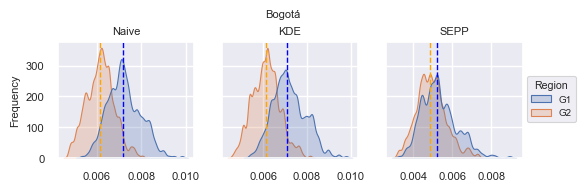

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Apply seaborn's default theme.
sns.set_theme()
# Define a color palette for the two groups (G1 and G2).
palette = {'G1': 'blue', 'G2': 'orange'}

# Load the fairness results DataFrame for Bogota from the TSV file.
# The path is relative to the current working directory ("DATOS/").
# NOTE: Ensure 'fairnes_predictions_Bogota.tsv' exists.
Fairness_table_bogota=pd.read_csv('fairnes_predictions_Bogota.tsv',sep='\t')
# Clean the 'tipo_fairness' column: replace 'Max-Min' with 'Max-min' for consistency.
Fairness_table_bogota['tipo_fairness'] = Fairness_table_bogota['tipo_fairness'].str.replace('Max-Min', 'Max-min')

# Extract EMD values for the Protected group (EMD_P) and rename the column to 'EMD'.
Fairness_table_bogota_p=Fairness_table_bogota[['Model','Percentage','EMD_P']].rename(columns={'EMD_P':'EMD'})
# Add a 'Group' column and label it 'G2' for the Protected group.
Fairness_table_bogota_p['Group']='G2'

# Extract EMD values for the Non-Protected group (EMD_NP) and rename the column to 'EMD'.
Fairness_table_bogota_np=Fairness_table_bogota[['Model','Percentage','EMD_NP']].rename(columns={'EMD_NP':'EMD'})
# Add a 'Group' column and label it 'G1' for the Unprotected group.
Fairness_table_bogota_np['Group']='G1'

# Concatenate the two DataFrames (Protected and Non-Protected EMD data) into a single DataFrame.
Fairness_table_bogota=pd.concat([Fairness_table_bogota_p,Fairness_table_bogota_np])

# Add a dummy column 'aux' with value 1, likely for counting purposes in grouping.
Fairness_table_bogota['aux']=1
# Round the 'EMD' values to 6 decimal places.
Fairness_table_bogota.EMD=[np.round(i,6) for i in Fairness_table_bogota.EMD]

# Group the DataFrame by Model, EMD, and Group, and count occurrences using the 'aux' column.
# This prepares the data for plotting distributions of EMD values.
# Fairness_table_bogota_aux=Fairness_table_bogota.copy() # Commented out line
Fairness_table_bogota=Fairness_table_bogota.groupby(by=['Model','EMD','Group']).agg({'aux':'sum'}).reset_index()

# Create a figure with 1 row and 3 columns for subplots, sharing the y-axis.
fig, axes = plt.subplots(1, 3, figsize=(6, 1.5),sharey=True)
# Set the seaborn context to 'paper' with a font scale.
sns.set_context("paper", font_scale=0.8)

# Iterate through the models and their corresponding subplot axes.
# for i, col in enumerate(['Group 1', 'Group 2']): # Commented out incorrect loop
for i, col in enumerate(['Naive','KDE','SEPP']): # Loop through model names
  # Create a subset of the data for the current model.
  subset = Fairness_table_bogota[(Fairness_table_bogota['Model'] == col)].reset_index(drop=True)

  # Determine if legend should be shown (only for the last subplot).
  logic=False
  if i==2:
    logic=True
  # Create a Kernel Density Estimate (KDE) plot for the current model's subset.
  # x="EMD" plots the distribution of EMD values.
  # hue="Group" colors the plots by group (G1/G2).
  # hue_order=['G1','G2'] specifies the order of hues.
  # fill=True fills the area under the KDE curve.
  # ax=axes[i] specifies the subplot to draw on.
  # bw_adjust=0.4 adjusts the bandwidth of the KDE.
  # gridsize=1000 sets the number of points in the evaluation grid.
  g=sns.kdeplot(subset
              ,legend=logic # Conditionally show legend
              ,x="EMD"
              ,hue="Group"
              ,hue_order=['G1','G2']
              ,fill=True
              ,ax=axes[i] # Draw on the current subplot
              ,bw_adjust=0.4 # Adjust bandwidth
              ,gridsize=1000) # Set grid size

  # Calculate the median EMD for each group (G1 and G2) within the current model's subset.
  median_g1 = subset[subset['Group'] == 'G1']['EMD'].median()
  median_g2 = subset[subset['Group'] == 'G2']['EMD'].median()

  # Add vertical lines on the plot to indicate the median EMD for each group.
  axes[i].axvline(median_g1, color='blue', linestyle='--', linewidth=1, label=f'G1 Median: {median_g1:.2f}')
  axes[i].axvline(median_g2, color='orange', linestyle='--', linewidth=1, label=f'G2 Median: {median_g2:.2f}')
  # Print the calculated median values for the current model's groups.
  print(median_g1,median_g2)

  # Customize axis labels and tick parameters for each subplot.
  if i!=0:
    # For subplots after the first one, remove the y-axis label.
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
  else:
    # For the first subplot, set the y-axis label.
    axes[i].set_ylabel('Frequency',size=8)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

  # Set the x-axis label to an empty string for all subplots.
  axes[i].set_xlabel('')
  # Set the title for the current subplot (model name).
  axes[i].set_title(f'{col}',size=8)

# Set the main title for the entire figure.
fig.suptitle("Bogotá", y=1.1, size=8) # y adjusts the title position, size sets font size

# Move the legend to a specific position outside the plot area.
# bbox_to_anchor specifies the position relative to the figure.
# title='Region' sets the legend title.
sns.move_legend(g, "upper left", bbox_to_anchor=(1, .75), title='Region')

#plt.tight_layout() # Commented out: Adjust layout to prevent overlap

# Save the figure to multiple file formats with specified resolution and bounding box.
# NOTE: Ensure the 'RESULTADOS/' directory exists before running this code.
# dpi=600 sets the resolution. bbox_inches='tight' tries to remove excess whitespace.
plt.savefig('RESULTADOS/fig6a.svg',dpi=600,bbox_inches='tight')
plt.savefig('RESULTADOS/fig6a.png',dpi=600,bbox_inches='tight')
plt.savefig('RESULTADOS/fig6a.eps',dpi=600,bbox_inches='tight')
# plt.savefig('RESULTADOS/fig6a.tiff',dpi=600,bbox_inches='tight') # TIFF format not included in original code

# Display the plot.
plt.show()


### 11. Load and Process EMD Data for Visualization (Bogota)
This block loads the Bogota fairness results DataFrame, standardizes the region names to 'Group 1' (Unprotected) and 'Group 2' (Protected), and prepares the Earth Mover's Distance (EMD) values for visualization. It combines the protected and unprotected EMD data into a single DataFrame, rounds the EMD values, and groups the data by Model, Value, EMD, and Group, counting the occurrences of each unique combination. This processed data is then ready for plotting distributions.

In [ ]:
# Import necessary libraries (redundant imports, but kept as in original)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Apply seaborn's default theme (kept as in original, likely already set).
sns.set_theme()
# Define a color palette for the two groups (G1 and G2) (kept as in original).
palette = {'G1': 'blue', 'G2': 'orange'}

# Load the fairness results DataFrame for Bogota from the TSV file.
# The path is relative to the current working directory ("DATOS/").
# NOTE: Ensure 'fairnes_predictions_Bogota.tsv' exists.
Fairness_table_bogota=pd.read_csv('fairnes_predictions_Bogota.tsv',sep='\t')
# Clean the 'tipo_fairness' column: replace 'Max-Min' with 'Max-min' for consistency (kept as in original).
Fairness_table_bogota['tipo_fairness'] = Fairness_table_bogota['tipo_fairness'].str.replace('Max-Min', 'Max-min')

# Extract EMD values for the Protected group (EMD_P) and rename the column to 'EMD'.
# Also select 'Model', 'Percentage', and 'Value' columns.
Fairness_table_bogota_p=Fairness_table_bogota[['Model','Percentage','Value','EMD_P']].rename(columns={'EMD_P':'EMD'})
# Add a 'Group' column and label it 'Group 1' for the Protected group.
# NOTE: This mapping 'Protected' -> 'Group 1' is different from the plotting code in cell 10 ('G2').
Fairness_table_bogota_p['Group']='Group 1'

# Extract EMD values for the Non-Protected group (EMD_NP) and rename the column to 'EMD'.
# Also select 'Model', 'Percentage', and 'Value' columns.
Fairness_table_bogota_np=Fairness_table_bogota[['Model','Percentage','Value','EMD_NP']].rename(columns={'EMD_NP':'EMD'})
# Add a 'Group' column and label it 'Group 2' for the Unprotected group.
# NOTE: This mapping 'Non-Protected' -> 'Group 2' is different from the plotting code in cell 10 ('G1').
Fairness_table_bogota_np['Group']='Group 2'

# Concatenate the two DataFrames (Protected and Non-Protected EMD data) into a single DataFrame.
Fairness_table_bogota=pd.concat([Fairness_table_bogota_p,Fairness_table_bogota_np])

#Fairness_table_bogota['aux']=1 # Commented out: Original dummy column creation

# Round the 'EMD' values to 3 decimal places.
Fairness_table_bogota.EMD=[np.round(i,3) for i in Fairness_table_bogota.EMD]

# Group the DataFrame by Model, Value, EMD, and Group, and count the occurrences of each combination.
# The 'Percentage' column is used for counting, effectively counting how many days/percentages
# resulted in the same Model, Value, EMD, and Group combination.
# reset_index() converts the grouped index back into columns.
# NOTE: The original grouping in cell 10 used 'aux' and grouped by Model, EMD, Group.
# This new grouping includes 'Value' and uses 'Percentage' for counting.
Fairness_table_bogota=Fairness_table_bogota.groupby(by=['Model','Value','EMD','Group']).agg({'Percentage':'count'}).reset_index()

# Display the first few rows of the processed and grouped DataFrame (implicit output).
Fairness_table_bogota.head()


,Model,Value,EMD,Group,Percentage
0,KDE,2.553878e-07,0.003,Group 1,1
1,KDE,2.553878e-07,0.004,Group 2,1
2,KDE,5.243325e-07,0.002,Group 1,1
3,KDE,5.243325e-07,0.004,Group 2,1
4,KDE,8.066697e-07,0.003,Group 1,1


### 12. Visualize EMD Distribution by Model and Region (Chicago Simulated Data)
This block loads the Chicago simulated fairness results, processes the Earth Mover's Distance (EMD) values for protected ('G2') and unprotected ('G1') regions, and visualizes their distribution using Kernel Density Estimation (KDE) plots. The plots are faceted by model (Naive, KDE, SEPP), showing the EMD distribution for each region group. Median EMD values for each group are also calculated and displayed as vertical lines on the plots.

0.002295 0.00376
0.0023005 0.003747
0.0016925 0.002926


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


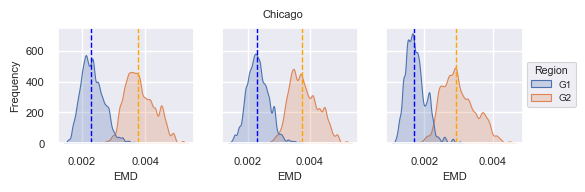

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Apply seaborn's default theme.
sns.set_theme()
# Define a color palette for the two groups (G1 and G2).
palette = {'G1': 'blue', 'G2': 'orange'} # Note: This palette is defined but not explicitly used in the sns.kdeplot call below.

# Load the fairness results DataFrame for Chicago simulated data from the TSV file.
# The path is relative to the current working directory ("DATOS/").
# NOTE: Ensure 'fairnes_predictions_Chicago.tsv' exists.
Fairness_table_chicago=pd.read_csv('fairnes_predictions_Chicago.tsv',sep='\t')
# Clean the 'tipo_fairness' column: replace 'Max-Min' with 'Max-min' for consistency.
Fairness_table_chicago['tipo_fairness'] = Fairness_table_chicago['tipo_fairness'].str.replace('Max-Min', 'Max-min')

# Extract EMD values for the Protected group (EMD_P) and rename the column to 'EMD'.
# Also select 'Model' and 'Percentage' columns.
Fairness_table_chicago_p=Fairness_table_chicago[['Model','Percentage','EMD_P']].rename(columns={'EMD_P':'EMD'})
# Add a 'Group' column and label it 'G2' for the Protected group.
Fairness_table_chicago_p['Group']='G2'

# Extract EMD values for the Non-Protected group (EMD_NP) and rename the column to 'EMD'.
# Also select 'Model' and 'Percentage' columns.
Fairness_table_chicago_np=Fairness_table_chicago[['Model','Percentage','EMD_NP']].rename(columns={'EMD_NP':'EMD'})
# Add a 'Group' column and label it 'G1' for the Unprotected group.
Fairness_table_chicago_np['Group']='G1'

# Concatenate the two DataFrames (Protected and Non-Protected EMD data) into a single DataFrame.
Fairness_table_chicago=pd.concat([Fairness_table_chicago_p,Fairness_table_chicago_np])

# Add a dummy column 'aux' with value 1, likely for counting purposes in grouping.
Fairness_table_chicago['aux']=1
# Round the 'EMD' values to 6 decimal places.
Fairness_table_chicago.EMD=[np.round(i,6) for i in Fairness_table_chicago.EMD]

# Group the DataFrame by Model, EMD, and Group, and count occurrences using the 'aux' column.
# This prepares the data for plotting distributions of EMD values.
# reset_index() converts the grouped index back into columns.
Fairness_table_chicago=Fairness_table_chicago.groupby(by=['Model','EMD','Group']).agg({'aux':'sum'}).reset_index()

# Create a figure with 1 row and 3 columns for subplots, sharing the y-axis.
fig, axes = plt.subplots(1, 3, figsize=(6, 1.5),sharey=True)
# Set the seaborn context to 'paper' with a font scale.
sns.set_context("paper", font_scale=0.8)

# Iterate through the models and their corresponding subplot axes.
# for i, col in enumerate(['Group 1', 'Group 2']): # Commented out incorrect loop
for i, col in enumerate(['Naive','KDE','SEPP']): # Loop through model names
  # Create a subset of the data for the current model.
  subset = Fairness_table_chicago[(Fairness_table_chicago['Model'] == col)].reset_index(drop=True)

  # Determine if legend should be shown (only for the last subplot).
  logic=False
  if i==2:
    logic=True

  # Calculate the overall median EMD for the current model's subset (variable 'mean_value' is unused).
  mean_value = subset['EMD'].median()

  # Create a Kernel Density Estimate (KDE) plot for the current model's subset.
  # x="EMD" plots the distribution of EMD values.
  # hue="Group" colors the plots by group (G1/G2).
  # hue_order=['G1','G2'] specifies the order of hues.
  # fill=True fills the area under the KDE curve.
  # ax=axes[i] specifies the subplot to draw on.
  # bw_adjust=0.4 adjusts the bandwidth of the KDE.
  # gridsize=1000 sets the number of points in the evaluation grid.
  g=sns.kdeplot(subset
              ,legend=logic # Conditionally show legend
              ,x="EMD"
              ,hue="Group"
              ,hue_order=['G1','G2']
              ,fill=True
              ,ax=axes[i] # Draw on the current subplot
              ,bw_adjust=0.4 # Adjust bandwidth
              ,gridsize=1000) # Set grid size

  # Calcular las medianas para cada grupo
  median_g1 = subset[subset['Group'] == 'G1']['EMD'].median()
  median_g2 = subset[subset['Group'] == 'G2']['EMD'].median()

  # Añadir líneas verticales para cada mediana
  axes[i].axvline(median_g1, color='blue', linestyle='--', linewidth=1, label=f'G1 Median: {median_g1:.2f}') # Add median line for G1
  axes[i].axvline(median_g2, color='orange', linestyle='--', linewidth=1, label=f'G2 Median: {median_g2:.2f}') # Add median line for G2
  # Print the calculated median values for the current model's groups.
  print(median_g1,median_g2)

  # Customize axis labels and tick parameters for each subplot.
  if i!=0:
    # For subplots after the first one, remove the y-axis label.
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
  else:
    # For the first subplot, set the y-axis label.
    axes[i].set_ylabel('Frequency',size=8)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

  # Set the x-axis label for all subplots.
  axes[i].set_xlabel('EMD',size=8)
  # Set the title for the current subplot (empty string in original).
  axes[i].set_title(f'{col}',size=8) # Set title to model name for clarity

# Set the main title for the entire figure.
fig.suptitle("Chicago", y=1.1, size=8) # y adjusts the title position, size sets font size (adjusted y)

# Move the legend to a specific position outside the plot area.
# bbox_to_anchor specifies the position relative to the figure.
# title='Region' sets the legend title.
sns.move_legend(g, "upper left", bbox_to_anchor=(1, .75), title='Region')


#plt.tight_layout() # Commented out: Adjust layout to prevent overlap

# Save the figure to multiple file formats with specified resolution and bounding box.
# NOTE: Ensure the 'RESULTADOS/' directory exists before running this code.
# dpi=600 sets the resolution. bbox_inches='tight' tries to remove excess whitespace.
plt.savefig('RESULTADOS/fig6b.svg',dpi=600,bbox_inches='tight')
plt.savefig('RESULTADOS/fig6b.png',dpi=600,bbox_inches='tight')
plt.savefig('RESULTADOS/fig6b.eps',dpi=600,bbox_inches='tight')
# plt.savefig('RESULTADOS/fig6b.tiff',dpi=600,bbox_inches='tight') # TIFF format not included in original code

# Display the plot.
plt.show()